In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# How to handle Catogerical Values
# 1.Frequent category imputation:

In [2]:
df=pd.read_csv('house_train.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head(20)

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
5,Gd,NaN,Attchd,143000
6,Ex,Gd,Attchd,307000
7,Gd,TA,Attchd,200000
8,TA,TA,Detchd,129900
9,TA,TA,Attchd,118000


In [3]:
# Interms of sum
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [4]:
# In terms of percentage
df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

Since BsmtQual and GarageType have low missing values we can replace them with the most occuring catogerical feature. IT will not distort the relation between the feature.

In [5]:
df.groupby(['BsmtQual'])['BsmtQual'].count()

BsmtQual
Ex    121
Fa     35
Gd    618
TA    649
Name: BsmtQual, dtype: int64

<Axes: xlabel='BsmtQual'>

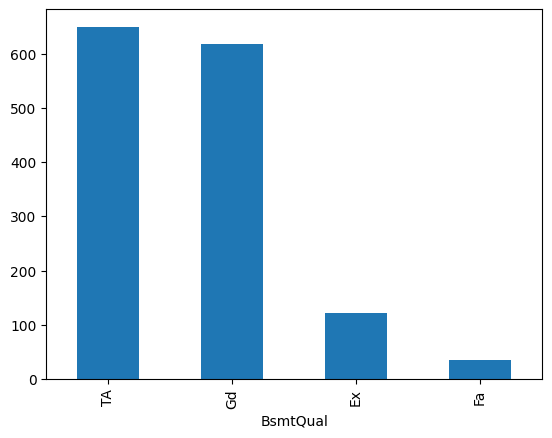

In [6]:
# using count() and sort_values().
# we can see this by grapn also with asscending order
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

<Axes: >

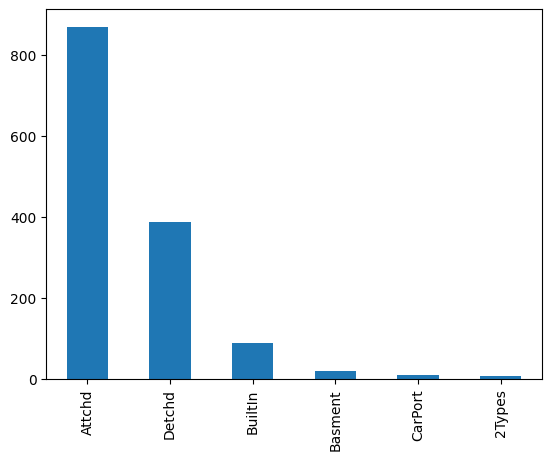

In [7]:
# using vlaue_counts()
df['GarageType'].value_counts().plot.bar()

<Axes: >

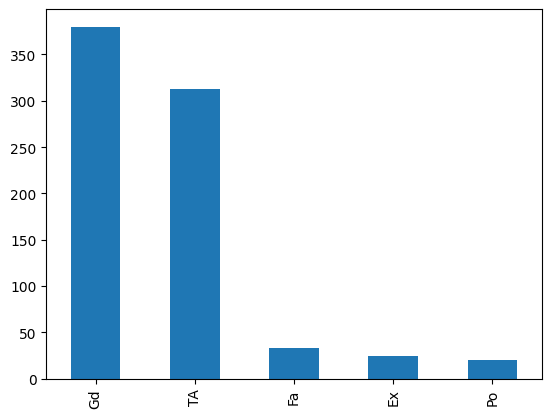

In [8]:
df['FireplaceQu'].value_counts().plot.bar()

In [9]:
# taking the max number repeting catogery in feature
x=df['GarageType'].value_counts()[0]
print("the max count of most repeated catogery : {}".format(x))

# taking name of most repetated catogery
y=df['GarageType'].value_counts().index[0]
print("Most repeated catogery : {}".format(y))

the max count of most repeated catogery : 870
Most repeated catogery : Attchd


In [10]:
# we can use mode also
df['GarageType'].mode()[0]
# use [0] to get accturate value

'Attchd'

In [11]:
# replacing function
def impute_nan(df,variable):
    most_frequent_catogery=df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent_catogery,inplace=True)

In [12]:
for feature in ['BsmtQual', 'FireplaceQu', 'GarageType']:
    impute_nan(df,feature)

In [13]:
df.head(20)

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
5,Gd,Gd,Attchd,143000
6,Ex,Gd,Attchd,307000
7,Gd,TA,Attchd,200000
8,TA,TA,Detchd,129900
9,TA,TA,Attchd,118000


we can see above there is no null value.

In [14]:
df.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

# Adventages:
1. easy and fatere way to implement

# Disadventages:
1. since we are using most frequent labels, it may use them in over represented way if there are many nans.(nan>40%)
2. it distorts the relationship of the msot frequent lable.

# 2.Adding a variable to capture NaN

In [72]:
df=pd.read_csv('house_train.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head(20)

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
5,Gd,NaN,Attchd,143000
6,Ex,Gd,Attchd,307000
7,Gd,TA,Attchd,200000
8,TA,TA,Detchd,129900
9,TA,TA,Attchd,118000


In [73]:
df['BsmtQual_var']=np.where(df['BsmtQual'].isnull(),1,0)
# if its null it is 1 other wise 0
df.head(20)

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0
5,Gd,NaN,Attchd,143000,0
6,Ex,Gd,Attchd,307000,0
7,Gd,TA,Attchd,200000,0
8,TA,TA,Detchd,129900,0
9,TA,TA,Attchd,118000,0


Now if we replace BsmtQual with most frequen value then model will get help in predection.

In [74]:
frequent=df['BsmtQual'].mode()[0]
frequent

'TA'

In [75]:
df['BsmtQual'].fillna(frequent,inplace=True)

In [76]:
df.head(20)

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0
5,Gd,NaN,Attchd,143000,0
6,Ex,Gd,Attchd,307000,0
7,Gd,TA,Attchd,200000,0
8,TA,TA,Detchd,129900,0
9,TA,TA,Attchd,118000,0


It will work well with the feature having msot msissing values

ex.,FireplaceQu

In [77]:
mode=df['FireplaceQu'].mode()[0]
mode

'Gd'

In [78]:
df['fire_var']=np.where(df['FireplaceQu'].isnull(),1,0)
df['FireplaceQu'].fillna(mode,inplace=True)
df.head(6)

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var,fire_var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0
5,Gd,Gd,Attchd,143000,0,1


# 3.Replace NaN with a new catogery
condition is if you have more frequent catogeries.

In [96]:
df=pd.read_csv('house_train.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head(6)

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
5,Gd,NaN,Attchd,143000


In [99]:
def impute_nan(df,variable):
    df[variable+"newvar"]=np.where(df[variable].isnull(),"Missing",df[variable])

In [100]:
for feature in ['BsmtQual', 'FireplaceQu', 'GarageType']:
    impute_nan(df,feature)

In [101]:
df.head(6)

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd
5,Gd,NaN,Attchd,143000,Gd,Missing,Attchd


In [102]:
df=df.drop(['BsmtQual', 'FireplaceQu', 'GarageType'],axis=1)
df.head(6)

,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd
5,143000,Gd,Missing,Attchd


# Handling Categorical Features.
# 1.One Hot Encoding

In [109]:
# loading titanic dataset.
df=pd.read_csv("titanic_train.csv")

In [110]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [116]:
# finding catogerical feateres in dataset
categorical_features=[feature for feature in df.columns if df[feature].dtypes==('O')]
categorical_features

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [121]:
# working on the the Sex feature
df=pd.read_csv('titanic_train.csv',usecols=['Sex'])
df.head()

,Sex
0,male
1,female
2,female
3,female
4,male


In [122]:
# one hot encoding
pd.get_dummies(df).head()

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [123]:
# above there are only two featuers and we can drop one
# remaning one feature is sufficient for the getting imformation to the model
pd.get_dummies(df,drop_first=True).head()

,Sex_male
0,1
1,0
2,0
3,0
4,1


In [127]:
df.shape

(891, 1)

In [135]:
# working on the the Embarked feature
df=pd.read_csv('titanic_train.csv',usecols=['Embarked'])
df.head()

,Embarked
0,S
1,C
2,S
3,S
4,S


In [136]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [137]:
# dropping nan values
df.dropna(inplace=True)
df.shape

(889, 1)

In [141]:
# we can drop one feature
# other two feature are sufficient to tell abotut dropped feature
pd.get_dummies(df,drop_first=True).head()

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


# Onehotencoding with many categories in a feature
# 2.count/frequency encoding

In [147]:
df=pd.read_csv('mercedesbenz.csv')
cat_variable=[feature for feature in df.columns if df[feature].dtype=='O']
cat_variable

['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']

In [148]:
df=pd.read_csv('mercedesbenz.csv',usecols=['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'])

In [149]:
df.head()

,X0,X1,X2,X3,X4,X5,X6,X8
0,k,v,at,a,d,u,j,o
1,k,t,av,e,d,y,l,o
2,az,w,n,c,d,x,j,x
3,az,t,n,f,d,x,l,e
4,az,v,n,f,d,h,d,n


In [156]:
# lets check the unique values from the X0
for i in df.columns:
    print(i,' have ',len(df[i].unique()),' unique values.')

X0  have  47  unique values.
X1  have  27  unique values.
X2  have  44  unique values.
X3  have  7  unique values.
X4  have  4  unique values.
X5  have  29  unique values.
X6  have  12  unique values.
X8  have  25  unique values.


In [158]:
df.X1.value_counts().sort_values(ascending=False).head(10)

aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
Name: X1, dtype: int64

we one hot encode the top 10 values only.

In [160]:
list_10=df.X1.value_counts().sort_values(ascending=False).head(10).index
list_10=list(list_10)

In [161]:
list_10

['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o']

In [164]:
for categories in list_10:
    df[categories]=np.where(df['X1']==categories,1,0)

In [166]:
list_10.append('X1')

In [167]:
df[list_10]

,aa,s,b,l,v,r,i,a,c,o,X1
0,0,0,0,0,1,0,0,0,0,0,v
1,0,0,0,0,0,0,0,0,0,0,t
2,0,0,0,0,0,0,0,0,0,0,w
3,0,0,0,0,0,0,0,0,0,0,t
4,0,0,0,0,1,0,0,0,0,0,v
...,...,...,...,...,...,...,...,...,...,...,...
4204,0,1,0,0,0,0,0,0,0,0,s
4205,0,0,0,0,0,0,0,0,0,1,o
4206,0,0,0,0,1,0,0,0,0,0,v
4207,0,0,0,0,0,1,0,0,0,0,r
